<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

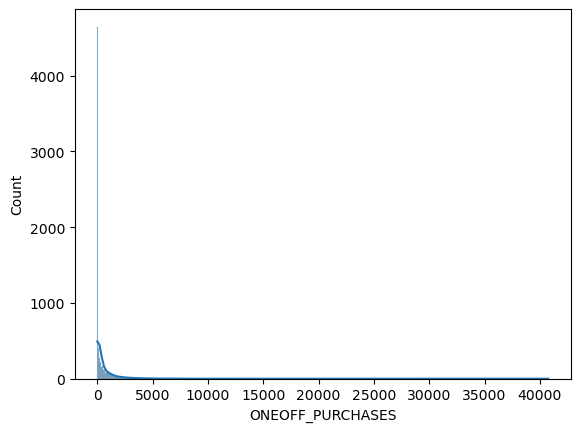

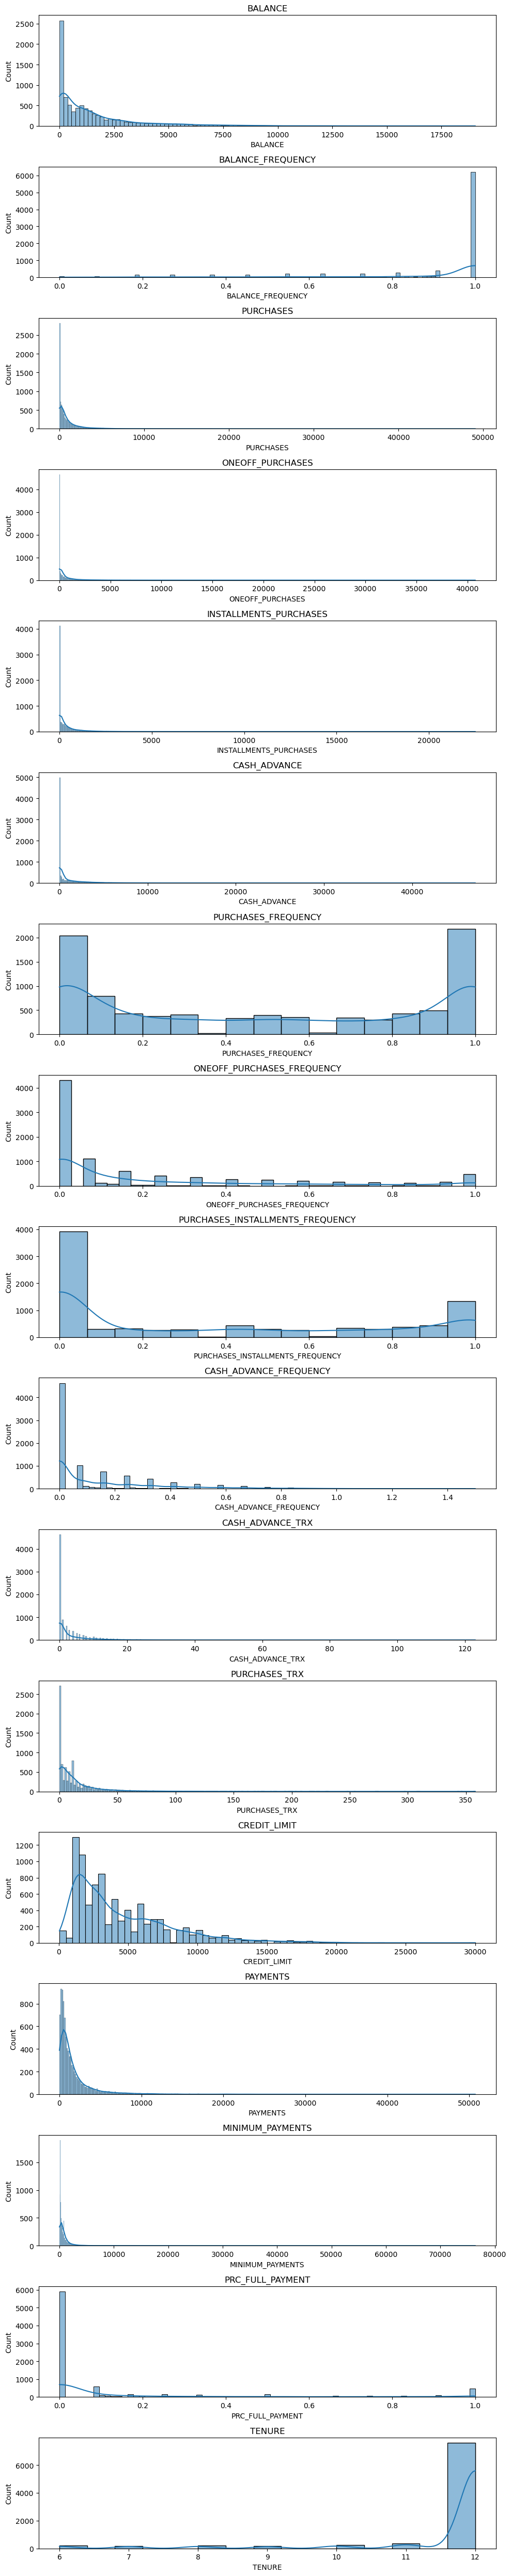

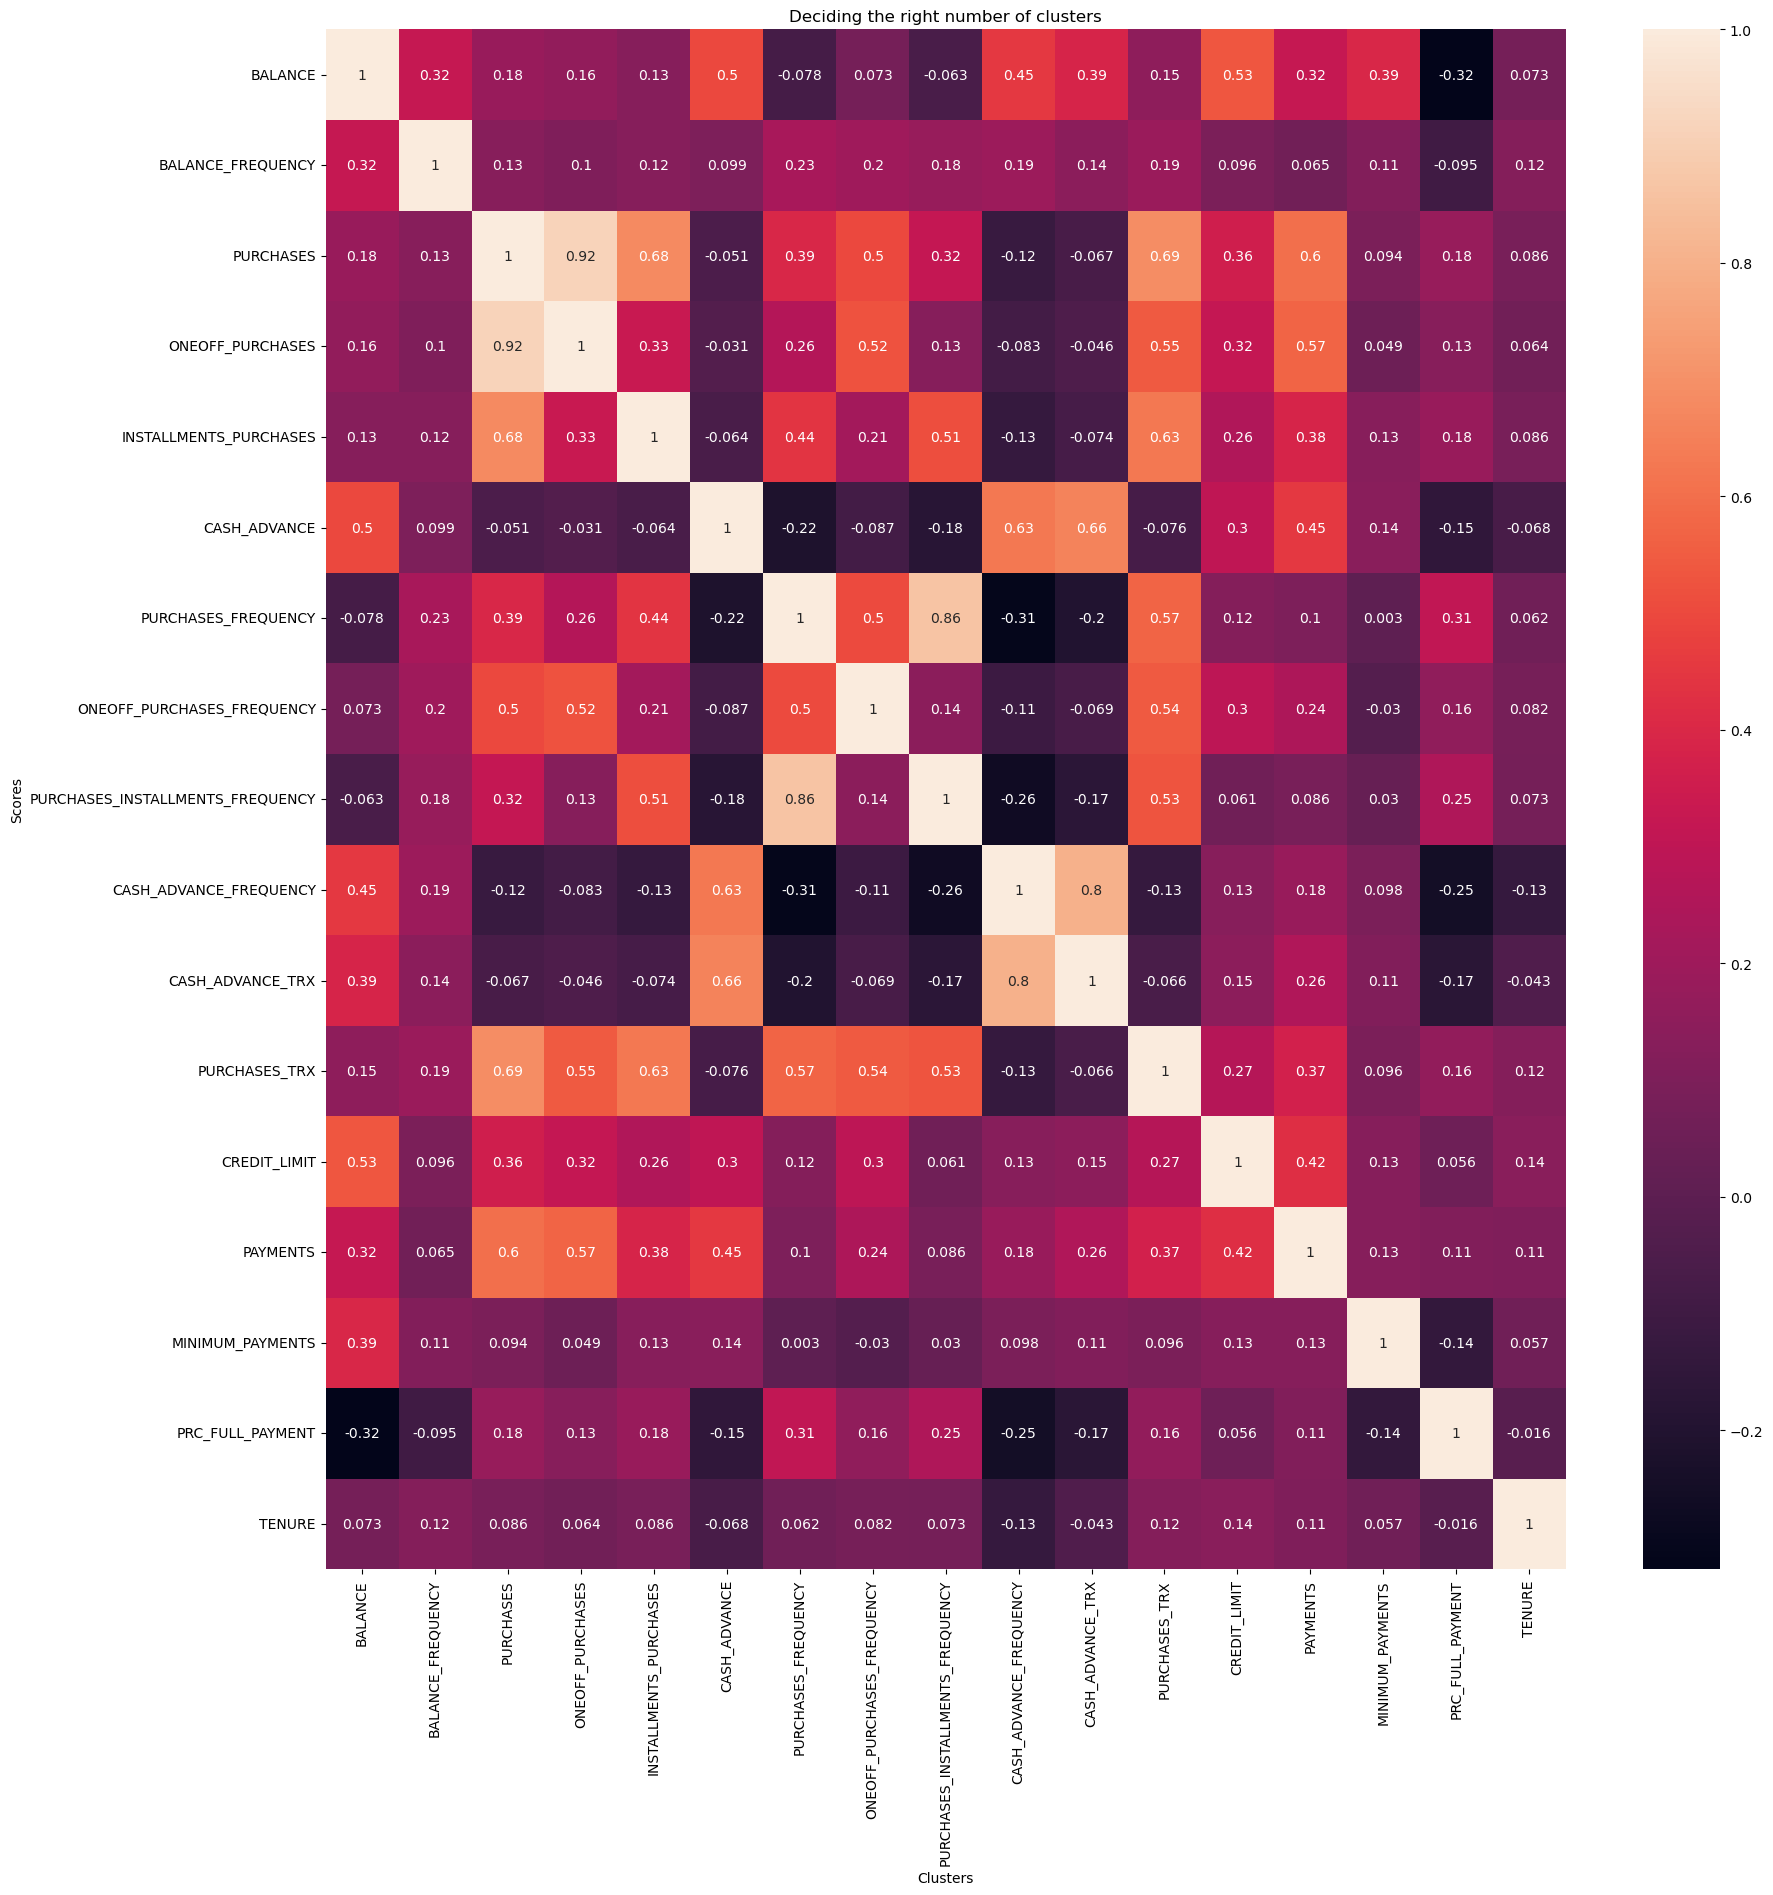

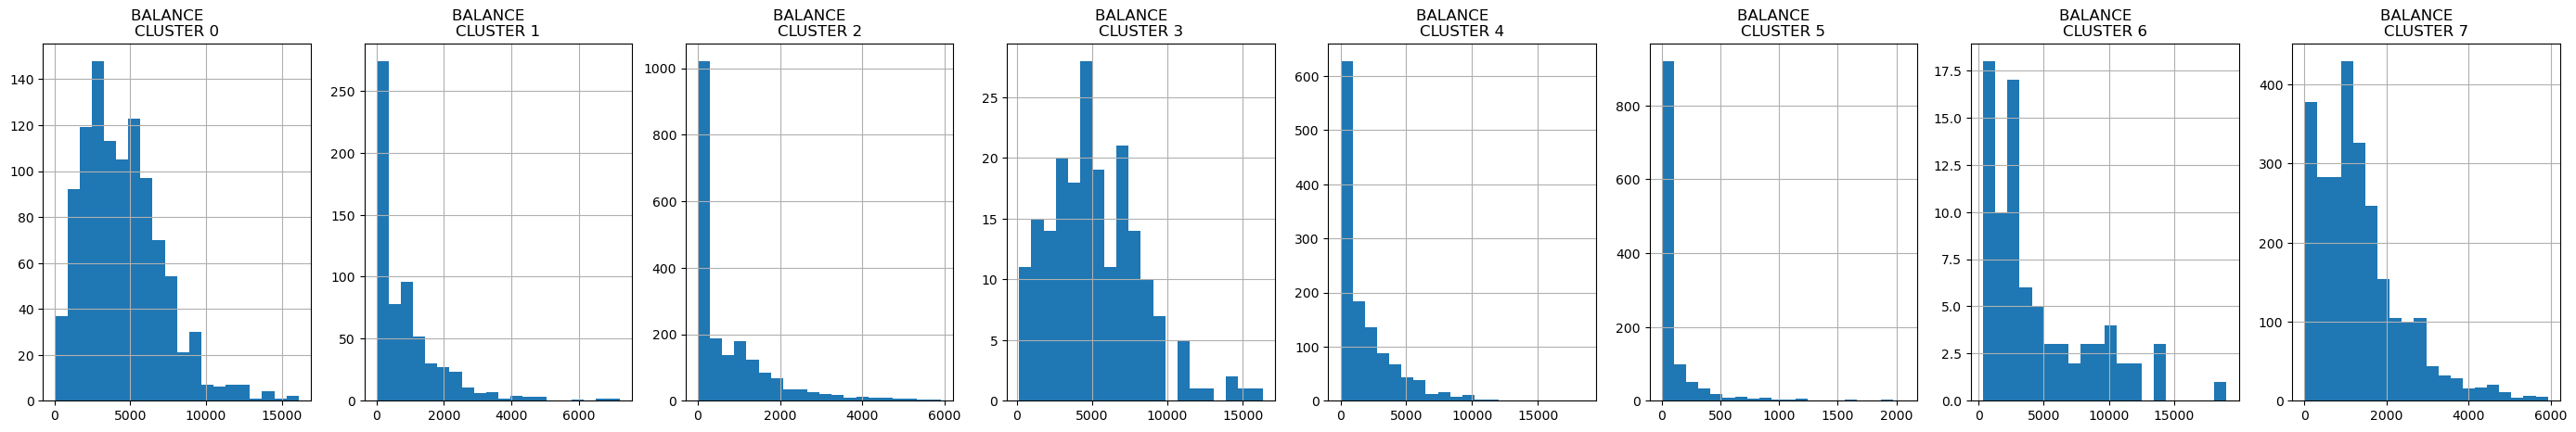

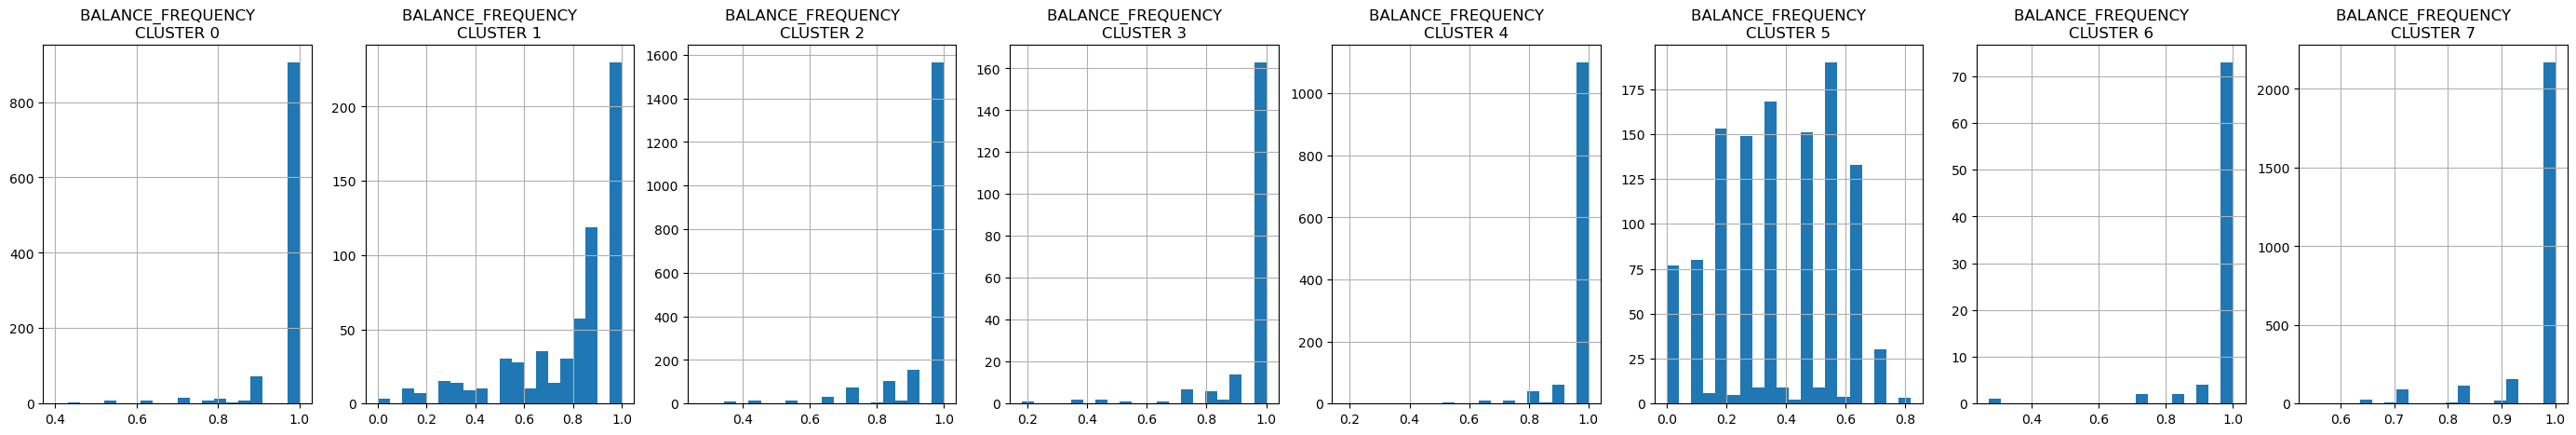

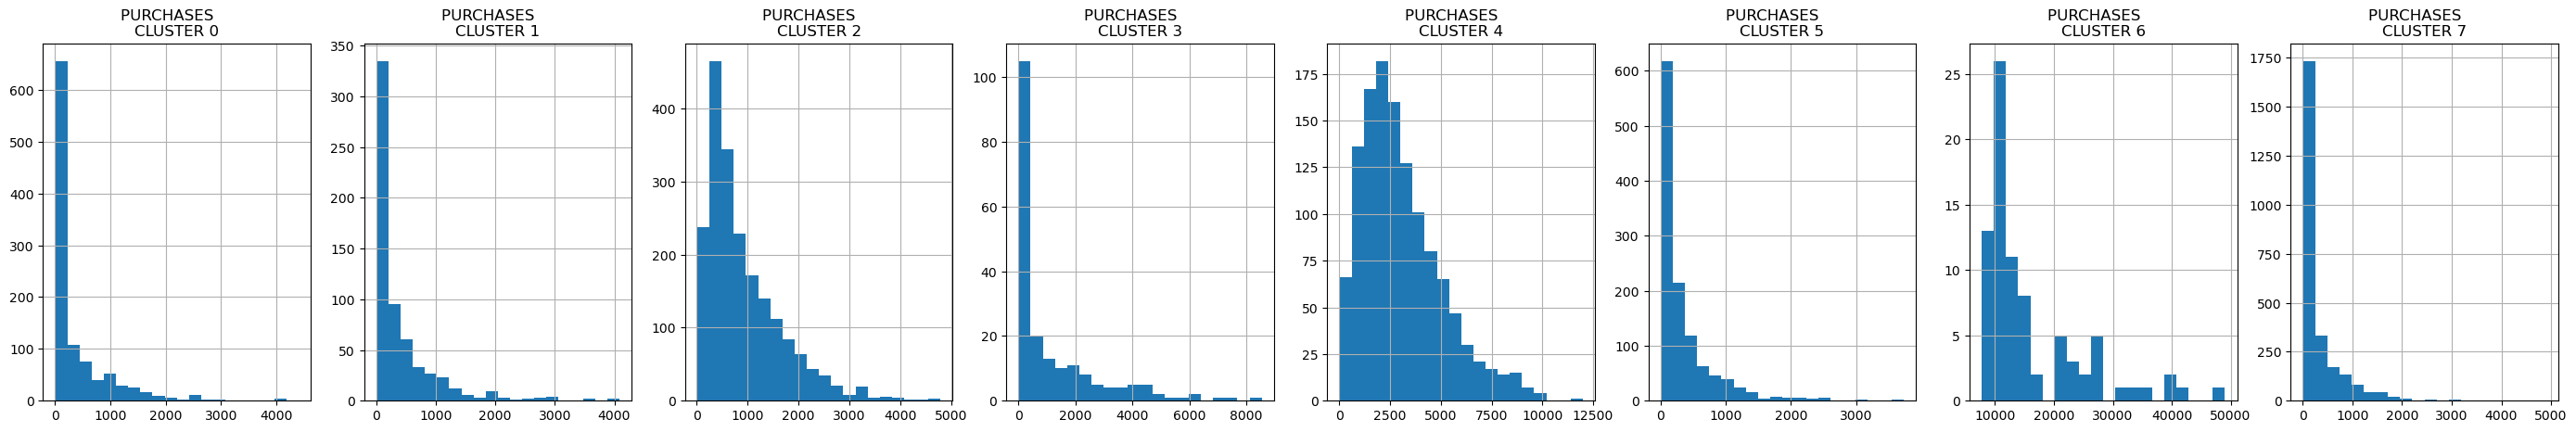

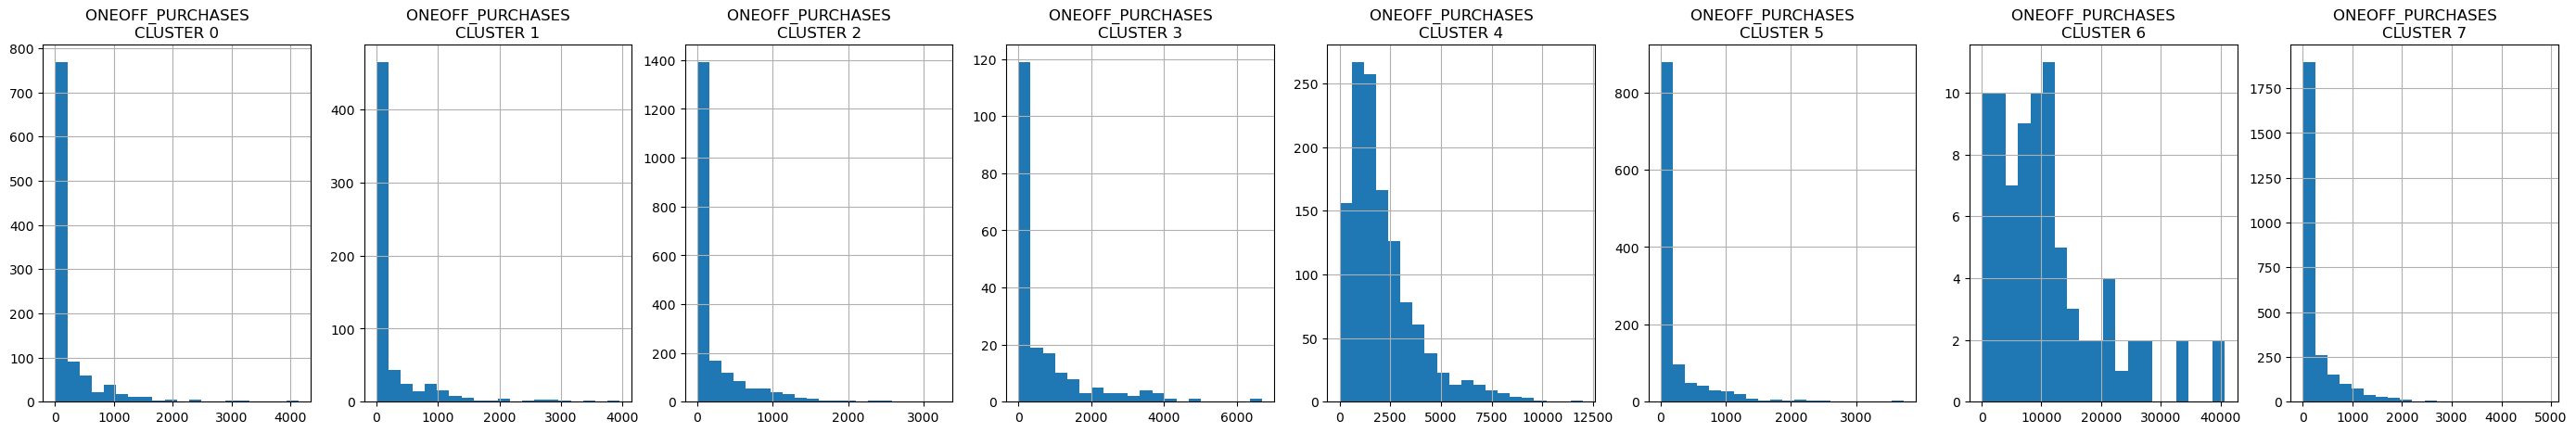

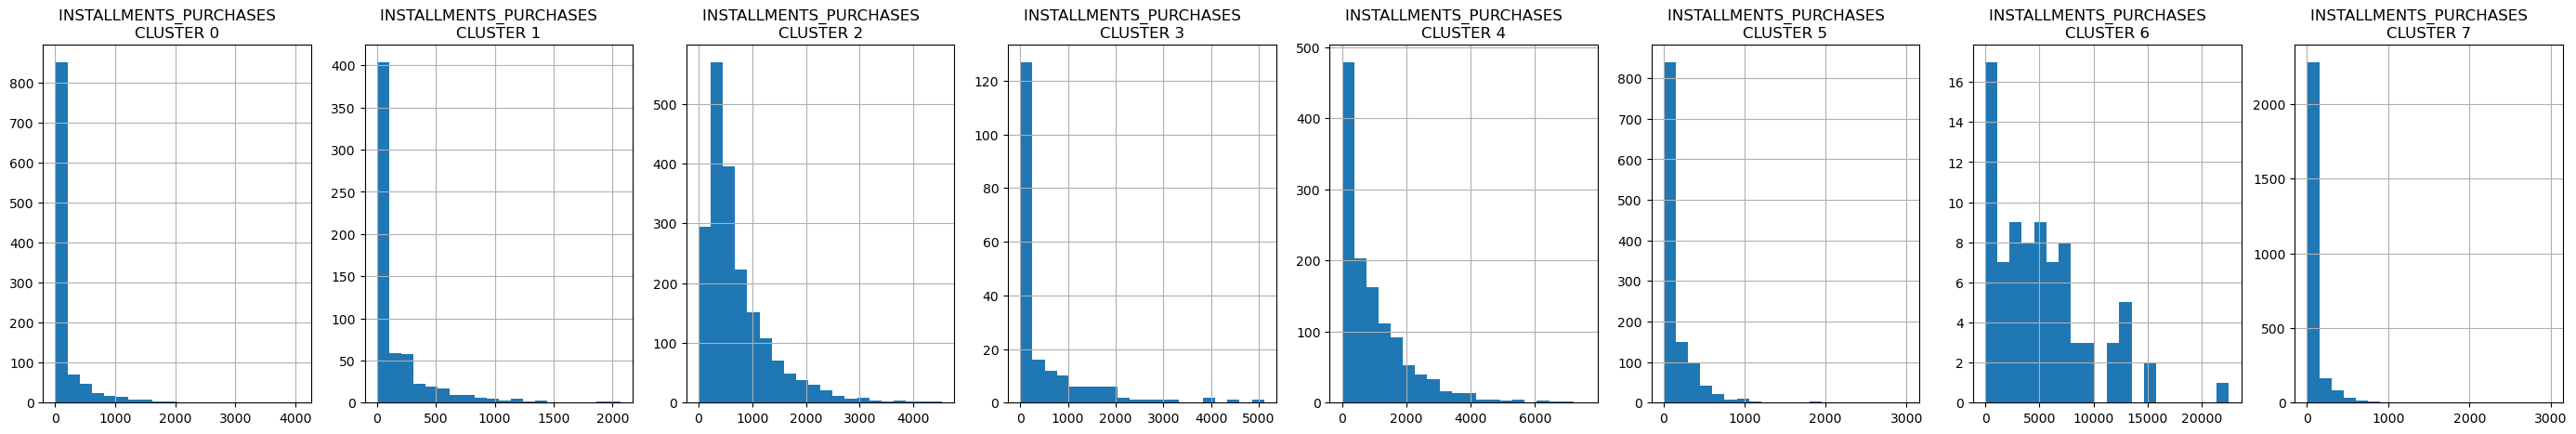

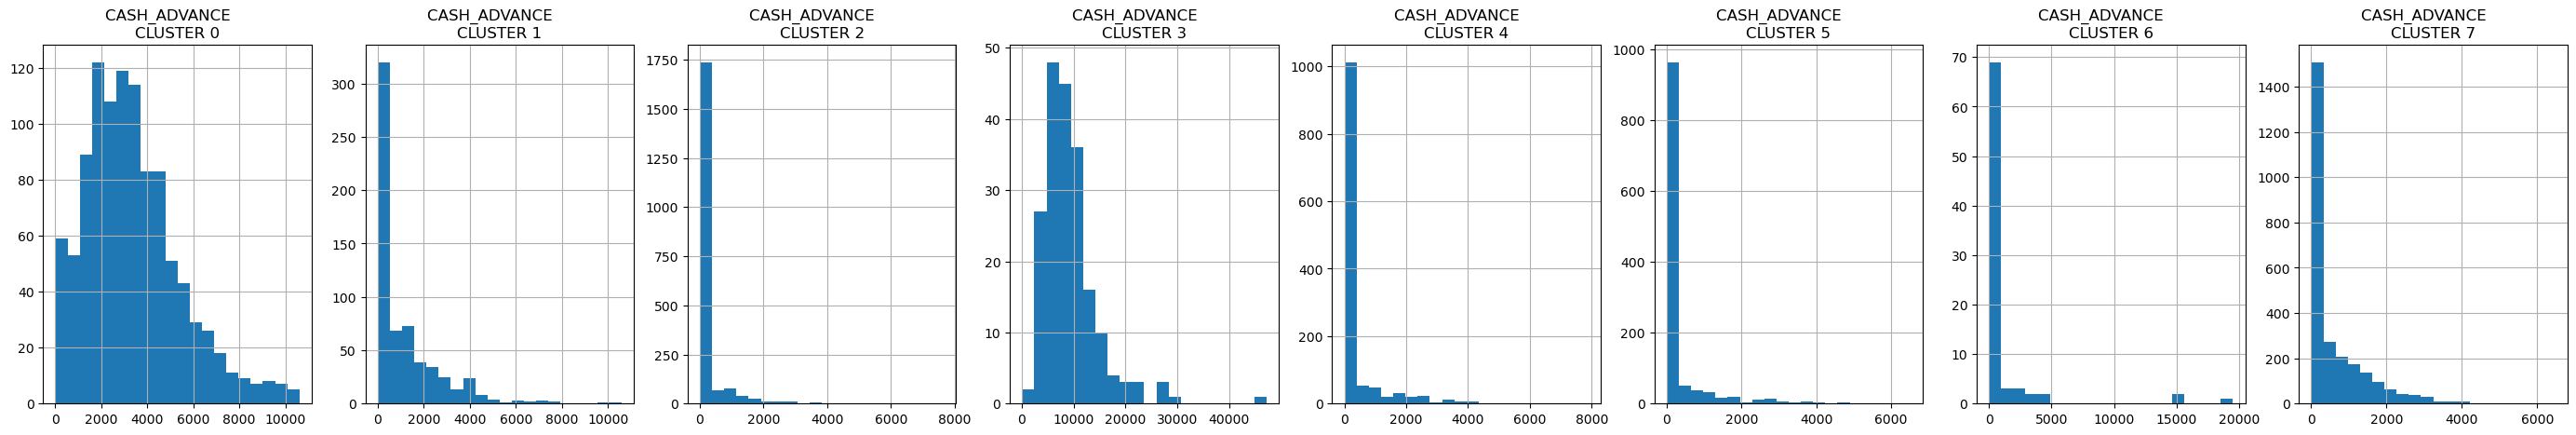

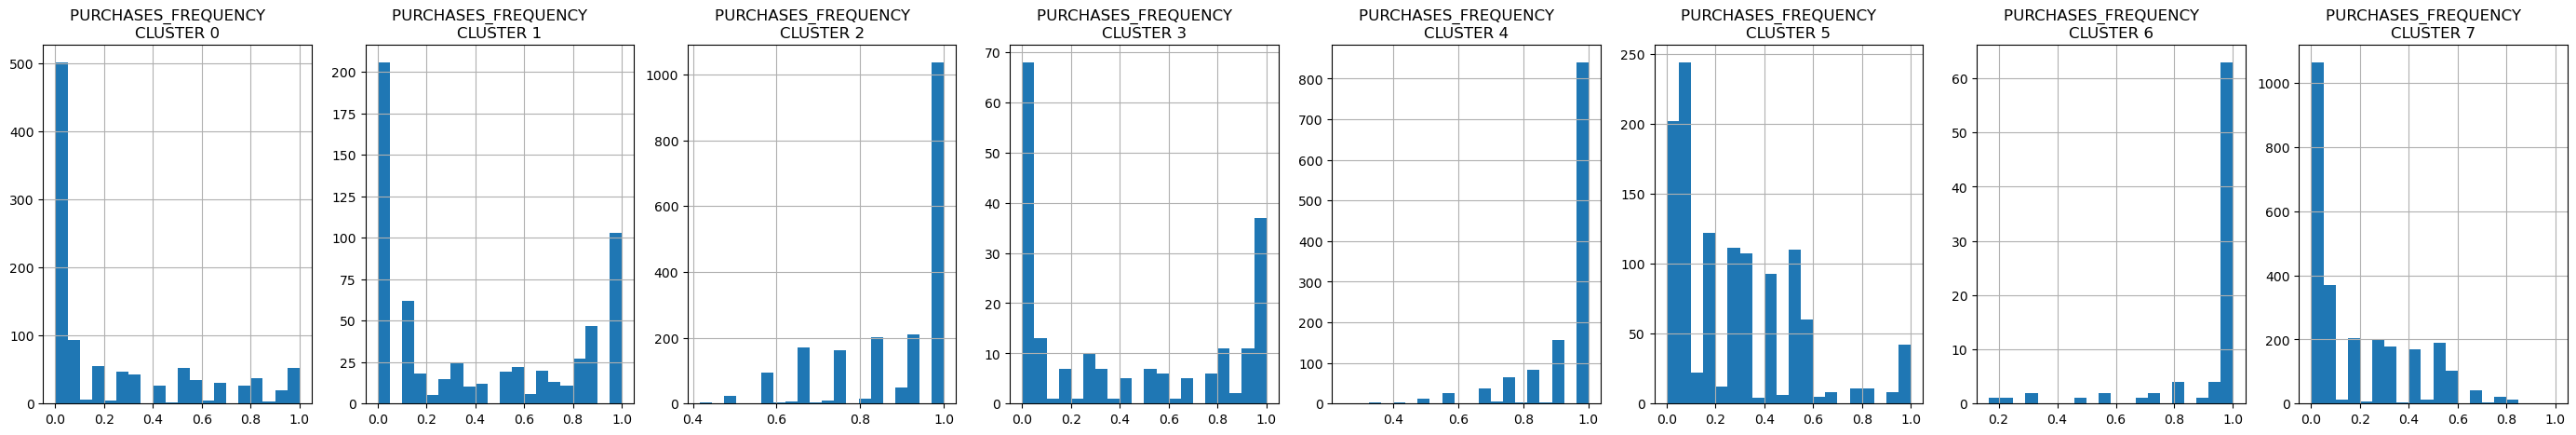

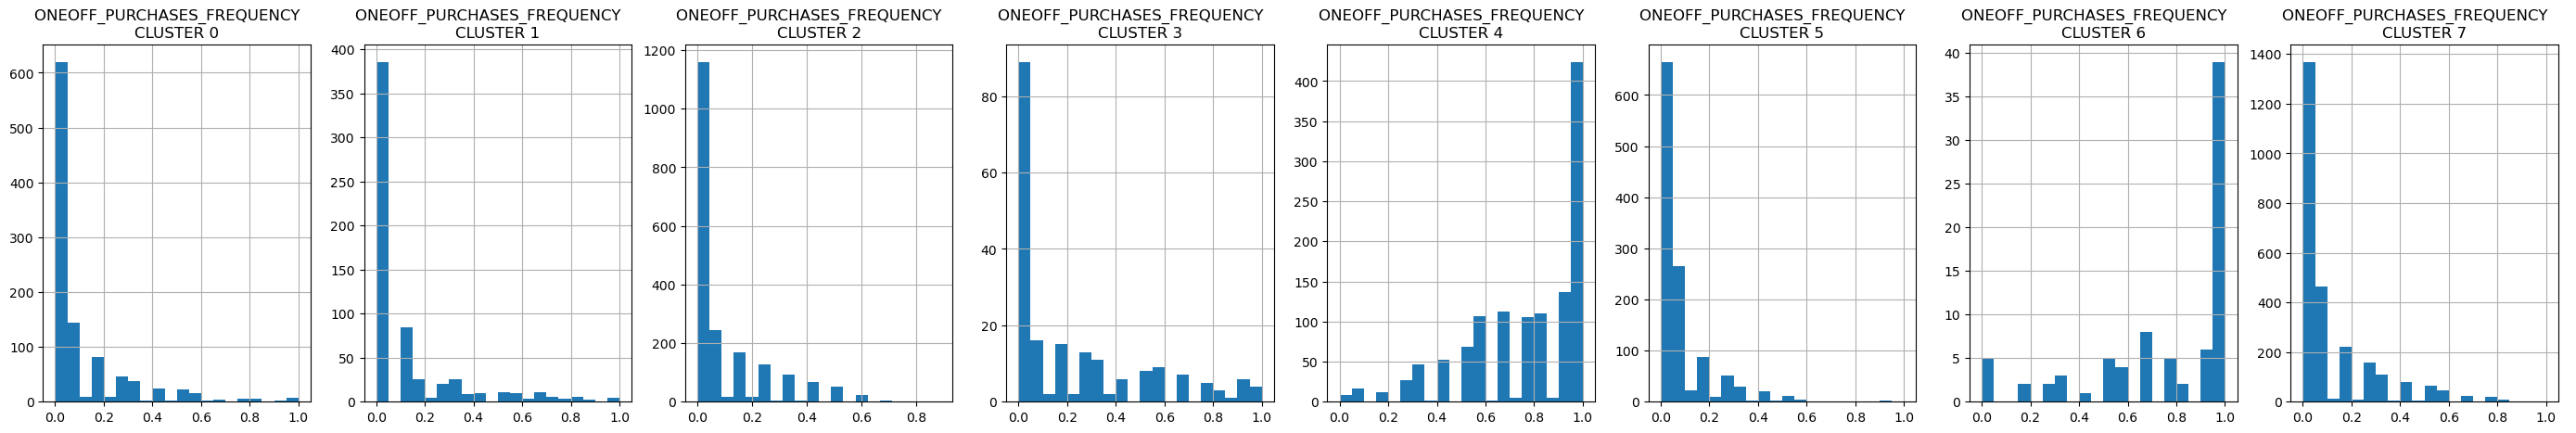

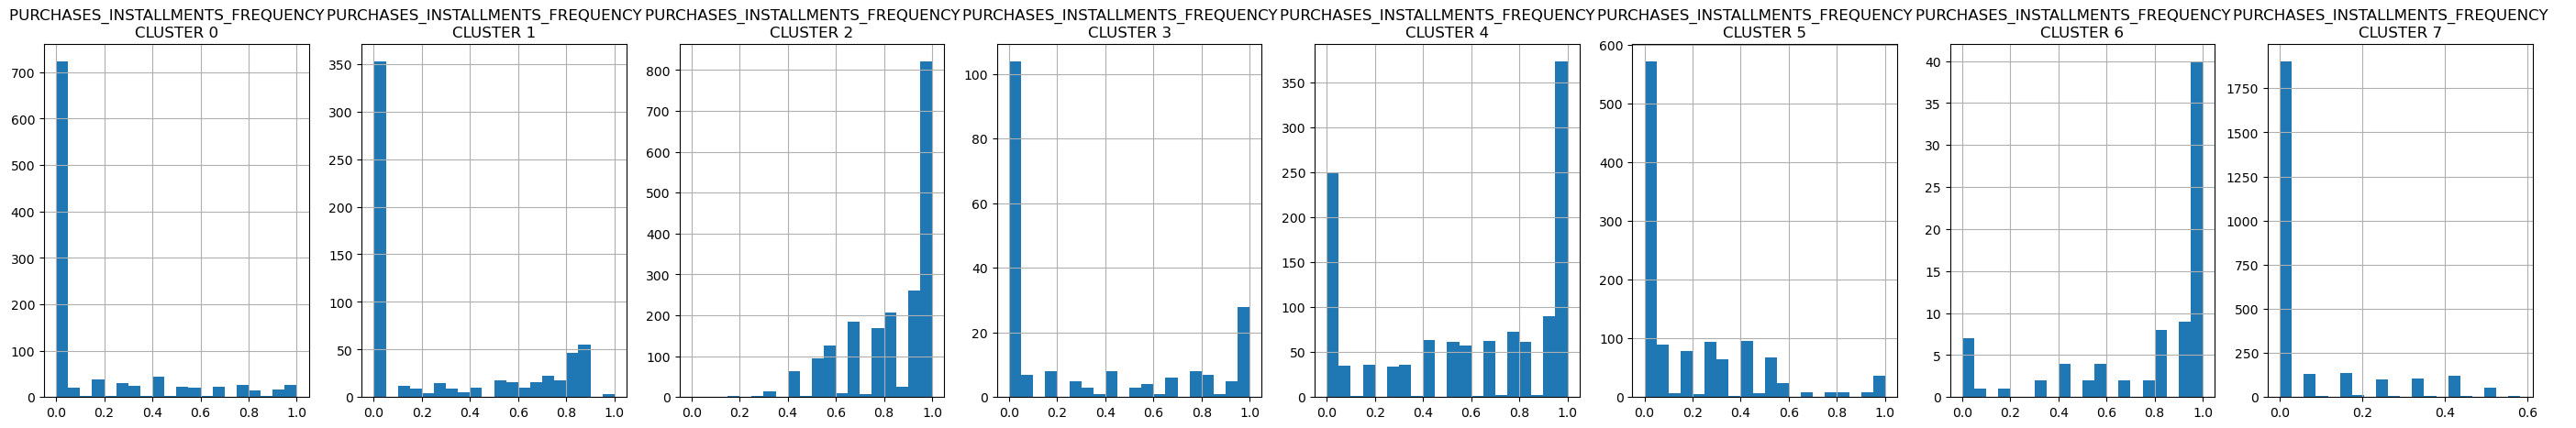

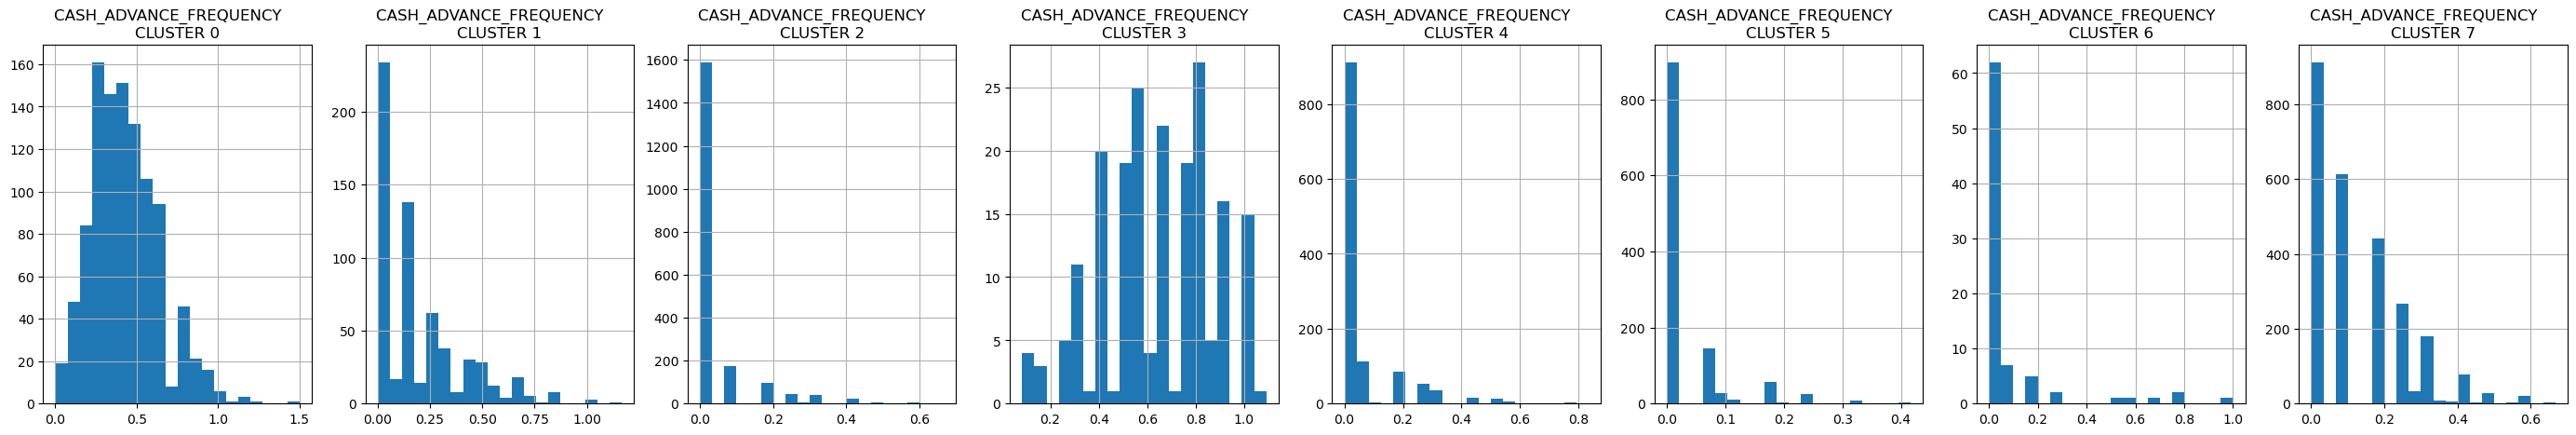

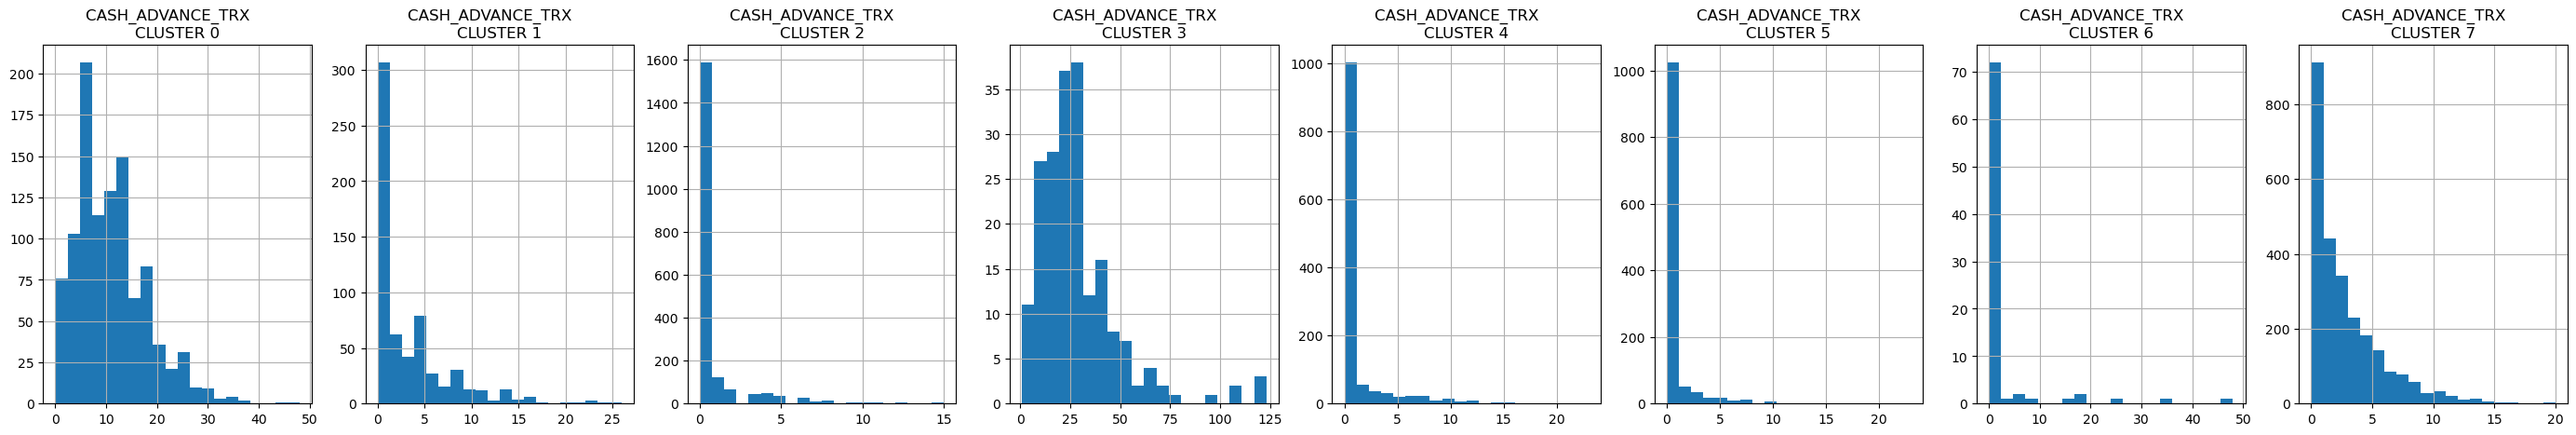

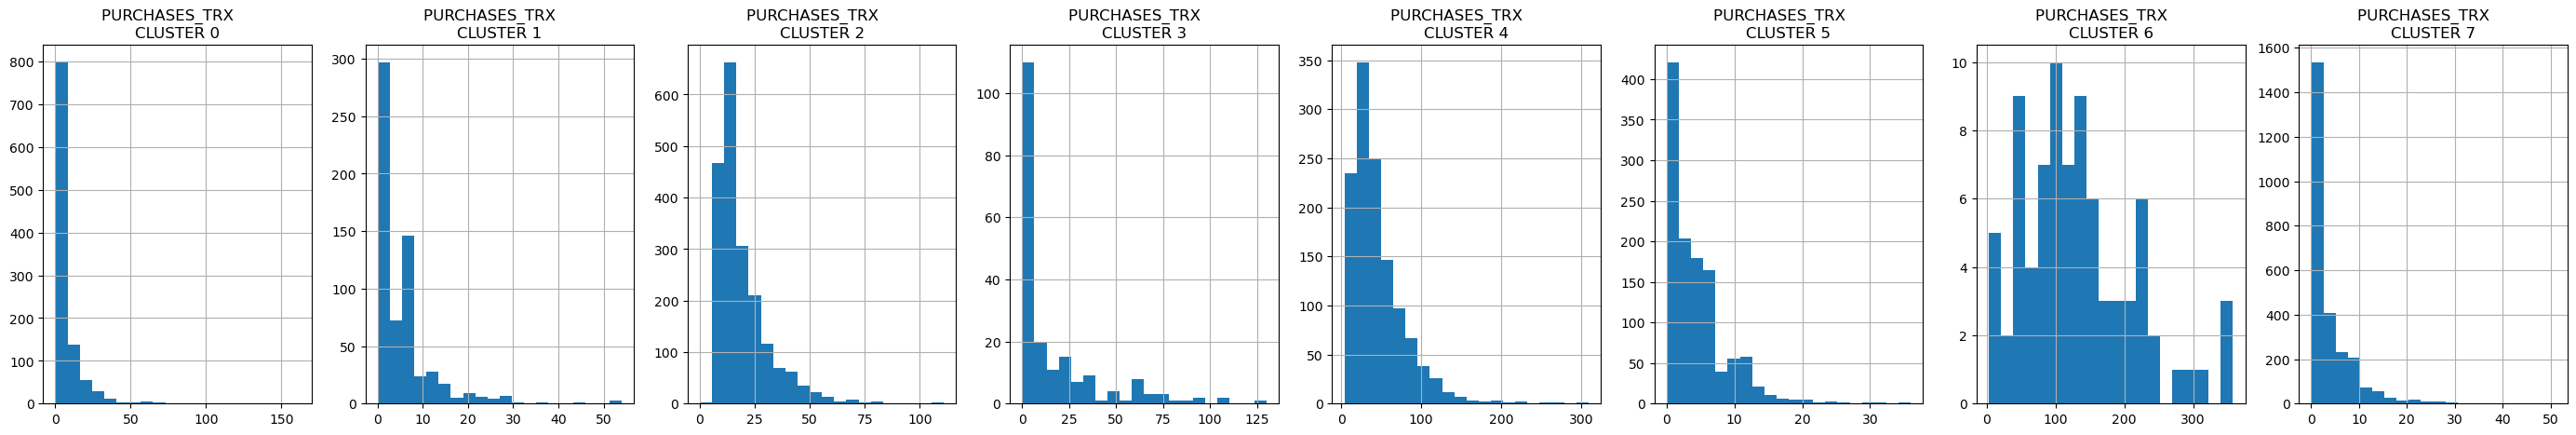

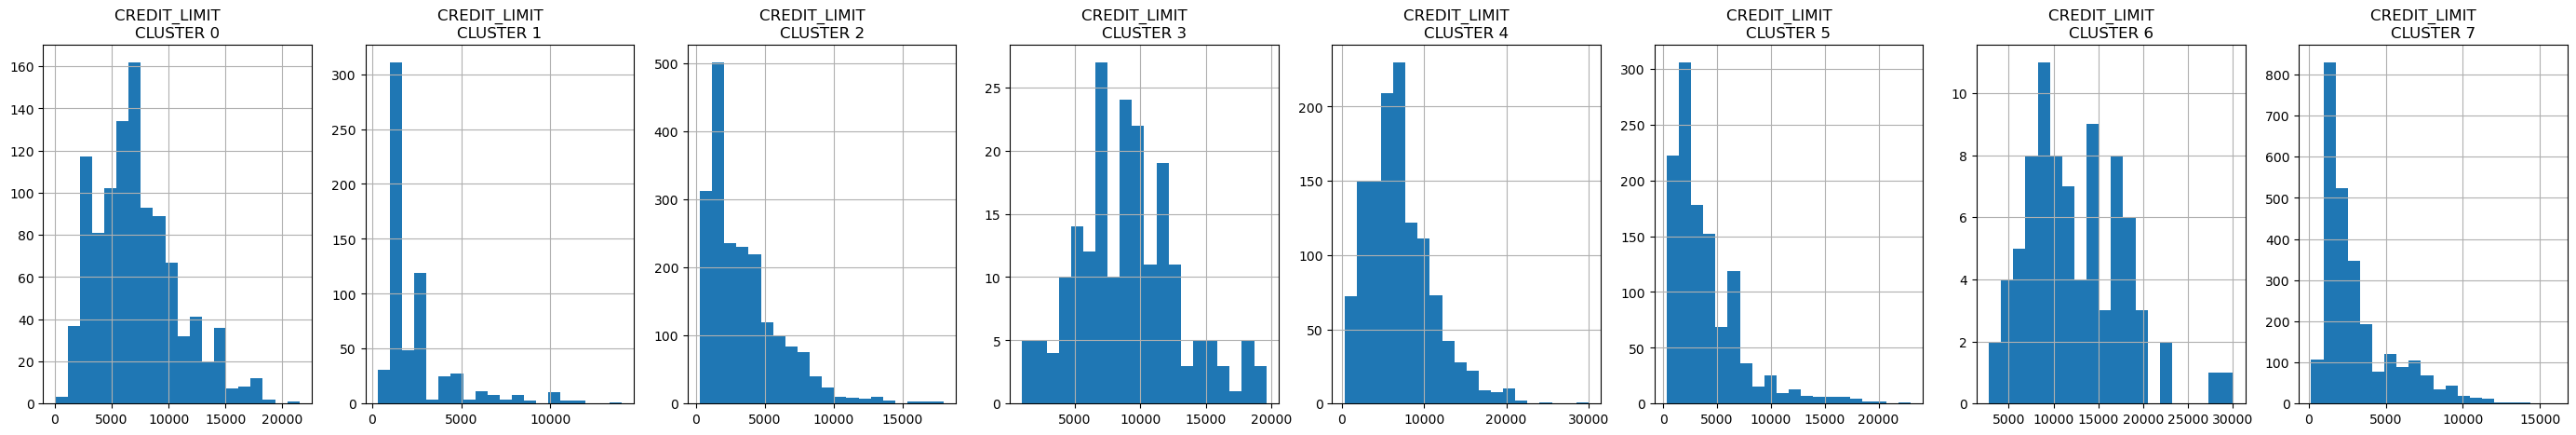

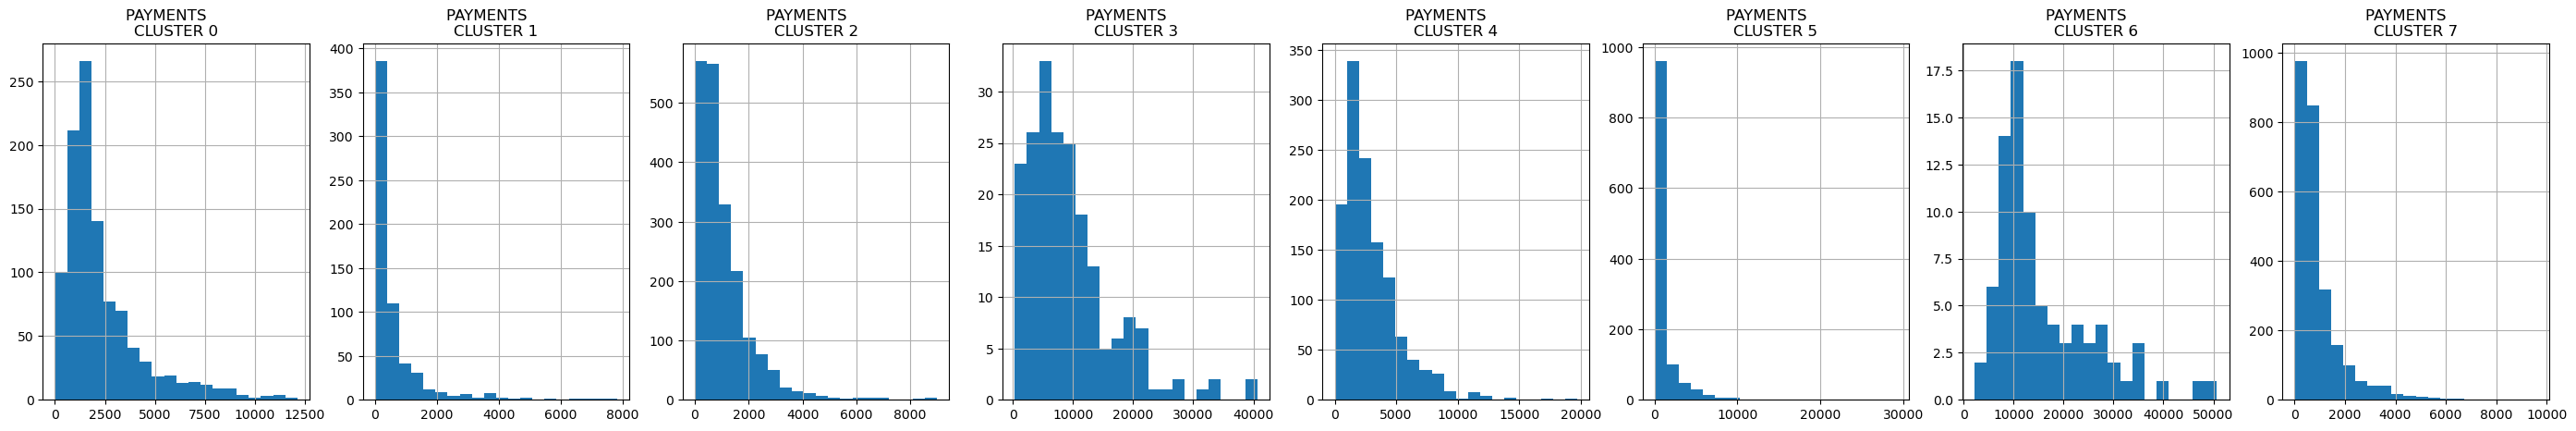

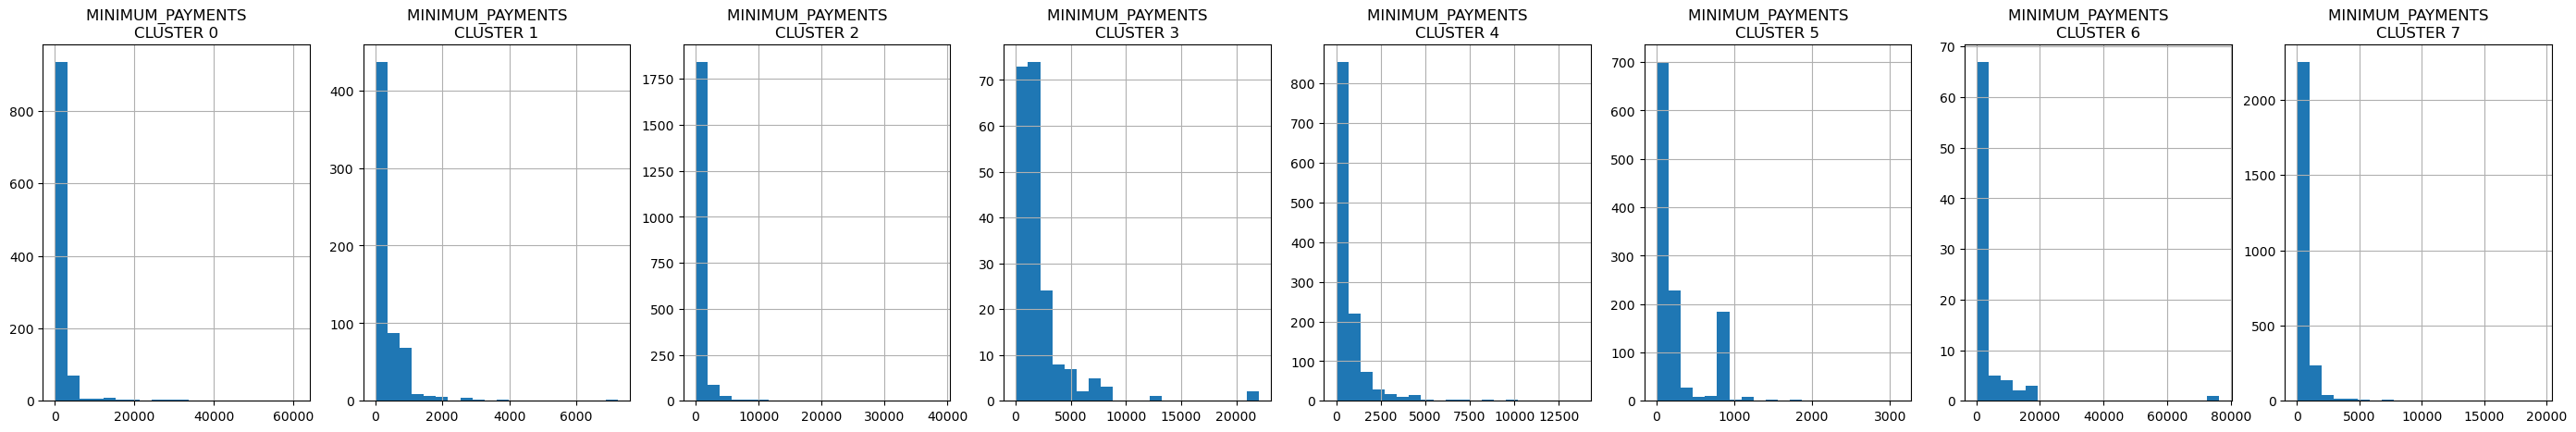

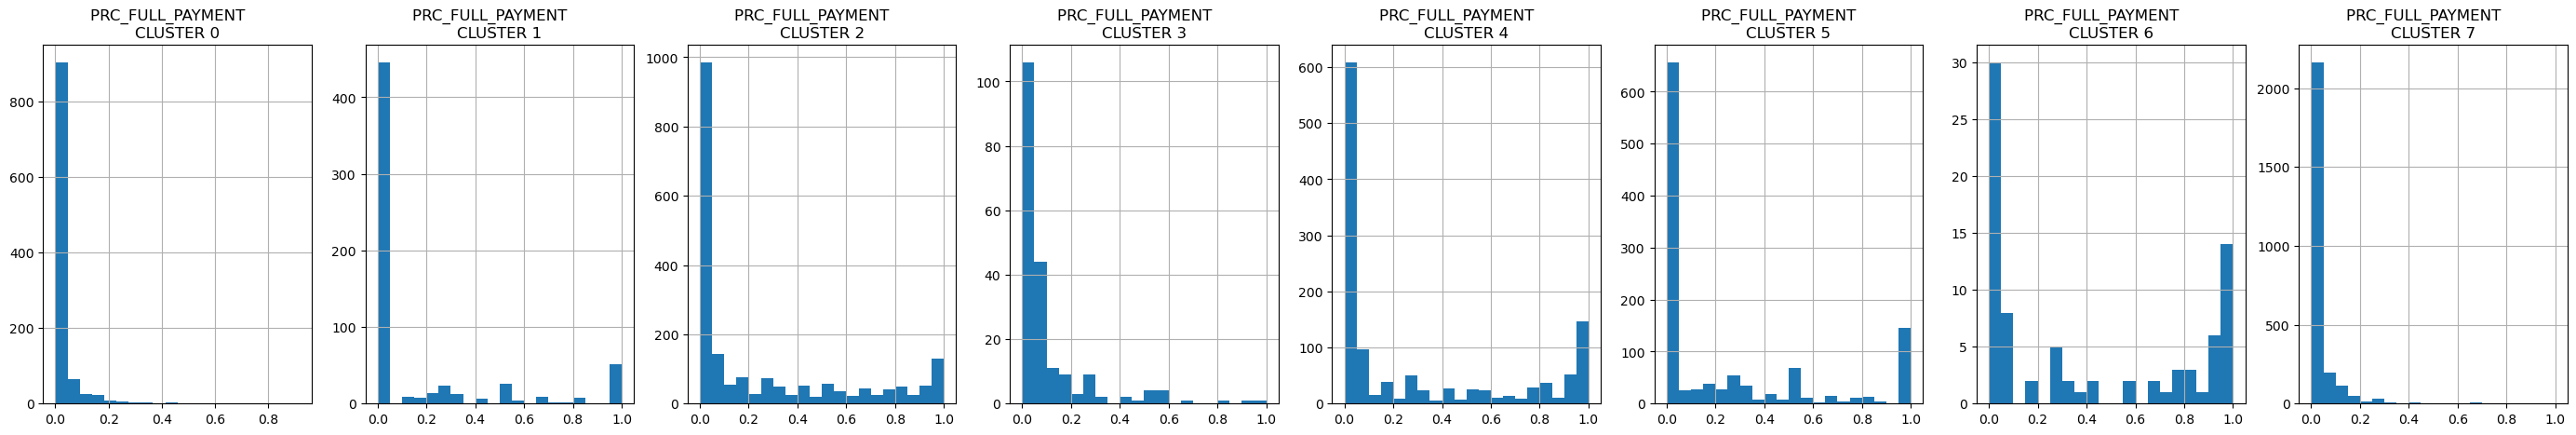

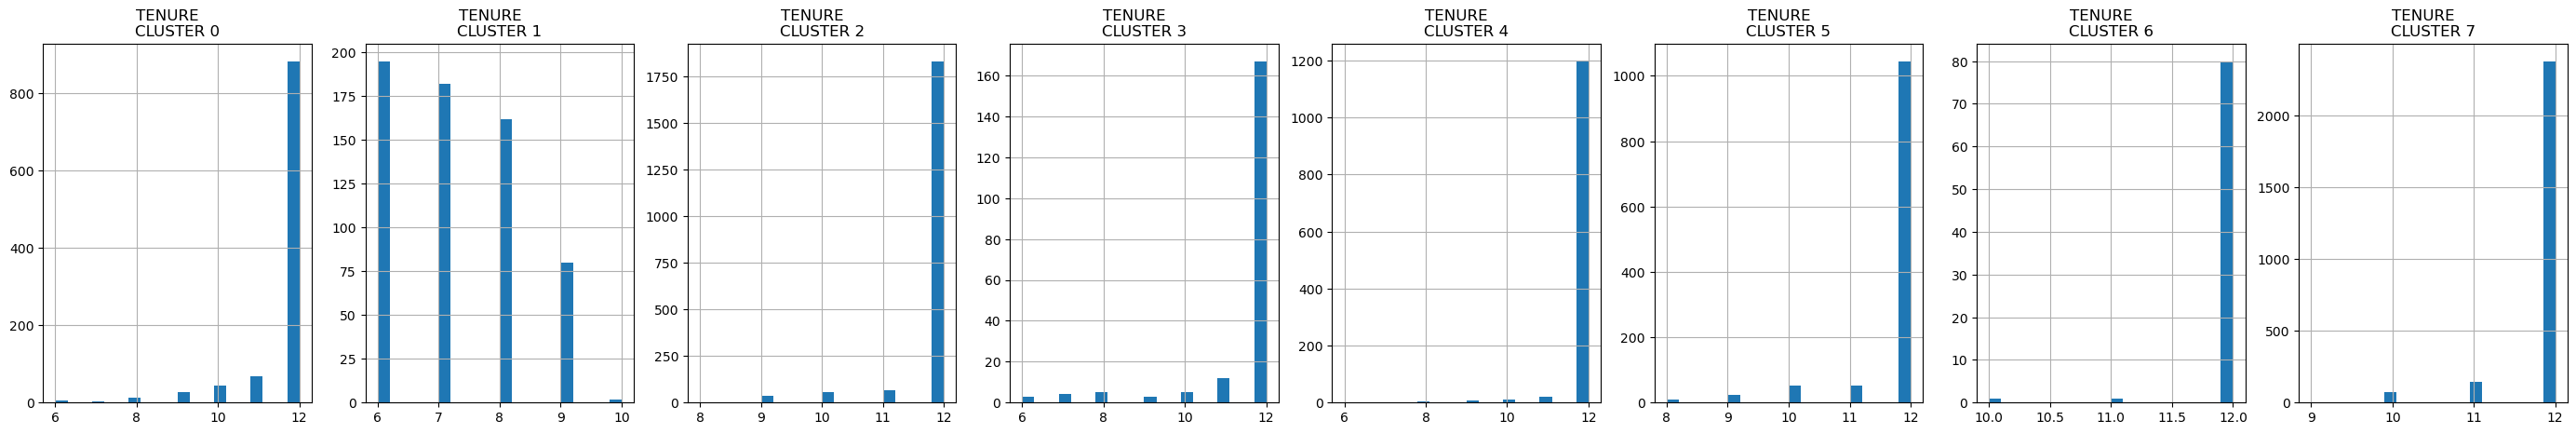

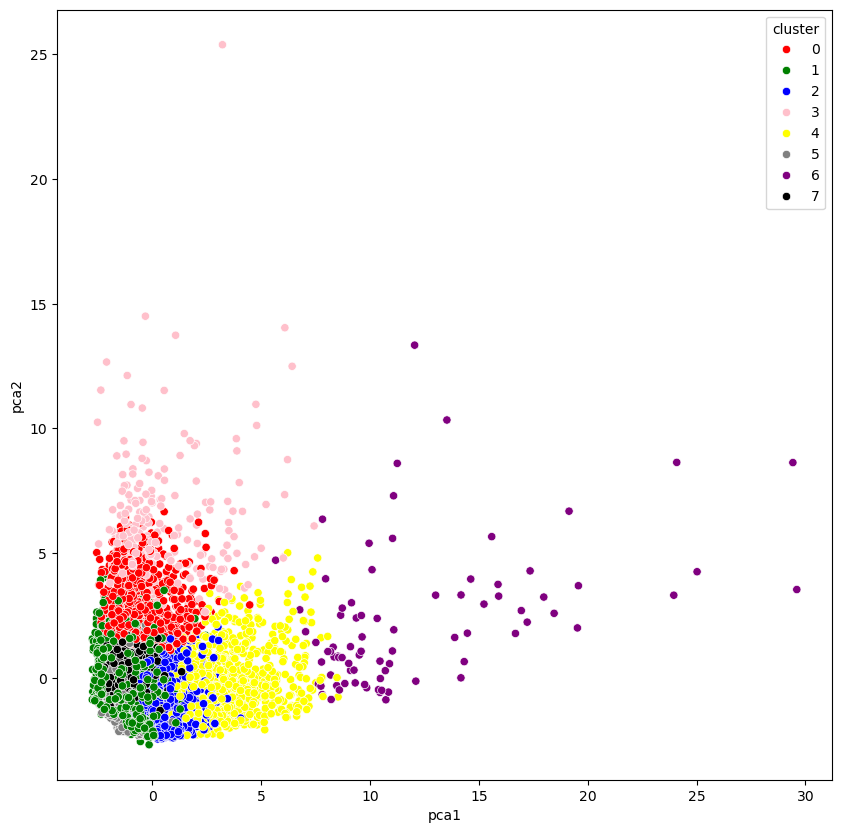

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data
cc_df = pd.read_csv('/Users/maereghabtezgi/Downloads/credit_card_dataset.csv')

# Basic analysis
cc_df.head()
cc_df.info()
cc_df.describe()

# Plot distribution with updated method (replace distplot)
sns.histplot(cc_df['ONEOFF_PURCHASES'], kde=True)

# Handle missing values
cc_df.isnull().sum()
cc_df.loc[cc_df['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].mean()
cc_df.loc[cc_df['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = cc_df['CREDIT_LIMIT'].mean()
cc_df.isnull().sum()

# Drop duplicates and unnecessary columns
cc_df.duplicated().sum()
cc_df.drop("CUST_ID", axis=1, inplace=True)

# Plot histograms for each feature
plt.figure(figsize=(10, 50))
for i in range(len(cc_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(data=cc_df[cc_df.columns[i]], kde=True)
    plt.title(cc_df.columns[i])
plt.tight_layout()

# Correlation heatmap
correlations = cc_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

# Scale the data
scaler = StandardScaler()
cc_df_scaled = scaler.fit_transform(cc_df)

# KMeans clustering
scores_1 = []
range_values = range(1, 18)
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cc_df_scaled)
    scores_1.append(kmeans.inertia_)

# Plot inertia (elbow method)
plt.plot(scores_1, 'bx-')
plt.title('Deciding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(cc_df_scaled)
labels = kmeans.labels_

# Inverse transform cluster centers
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=cc_df.columns)
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=cc_df.columns)
cluster_centers

# Create a new DataFrame with cluster labels
cc_df_cluster = pd.concat([cc_df, pd.DataFrame({'CLUSTER': labels})], axis=1)

# Plot histograms of features for each cluster
for i in cc_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = cc_df_cluster[cc_df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCLUSTER {}'.format(i, j))
    plt.show()

# PCA for visualization
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(cc_df_scaled)
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df,
                palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])
plt.show()

